# Taller 2: Análisis de Subsidios de Vivienda

Análisis exploratorio y visualización de datos utilizando la base de datos **"Subsidios De Vivienda Asignados"** para investigar las asignaciones de subsidios en Colombia entre 2003 y 2024.


#### 1. Preparación del entorno:
- Descarga la base de datos en formato CSV desde el enlace proporcionado: **[Subsidios De Vivienda Asignados](#)**.

In [3]:
#Realizamos la importaciones necesarias
import pandas as pd
import sqlite3 as sqlite
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
#Rescatamos la base de datos usando la url 'https://www.datos.gov.co/resource/h2yr-zfb2.json' donde le agregamos el parametro $limit con el valor total de las filas,
#que en este caso son 80567
url_data = 'https://www.datos.gov.co/resource/h2yr-zfb2.json?$limit=80567'
data = pd.read_json(url_data)
data

,departamento,c_digo_divipola_departamento,municipio,c_digo_divipola_municipio,programa,a_o_de_asignaci_n,estado_de_postulaci_n,hogares,valor_asignado
0,AMAZONAS,91,LETICIA,91001,Bolsa Esfuerzo Territorial,2005,Asignados,6,45108000.0
1,AMAZONAS,91,LETICIA,91001,Programa Vivienda Gratuita Fase I,2015,Renuncias al subsidio,2,111914880.0
2,AMAZONAS,91,LETICIA,91001,Programa Vivienda Gratuita Fase I,2016,Asignados,5,279818000.0
3,ANTIOQUIA,5,ABEJORRAL,5002,Bolsa Desplazados,2005,Asignados,2,17900000.0
4,ANTIOQUIA,5,ABEJORRAL,5002,Bolsa Desplazados,2007,Asignados,21,236382500.0
...,...,...,...,...,...,...,...,...,...
80562,VICHADA,99,PUERTO CARREÑO,99001,Bolsa Desplazados,2008,Asignados,44,589488249.9
80563,VICHADA,99,PUERTO CARREÑO,99001,Bolsa Desplazados,2010,Asignados,1,15450000.0
80564,VICHADA,99,PUERTO CARREÑO,99001,Bolsa Esfuerzo Territorial,2005,Apto con subsidio vencido,1,7518000.0
80565,VICHADA,99,PUERTO CARREÑO,99001,Programa Vivienda Gratuita Fase I,2016,Asignados,1,54705600.0


- Carga los datos en una base de datos SQLite usando `sqlite3`.

In [6]:
#Crear una conexión a la base de datos SQLite
conn = sqlite.connect('subsidios_vivienda.db')

#Cargar el DataFrame a una tabla SQLite
data.to_sql('subsidios_vivienda_asignados', conn, if_exists='replace', index=False)

#Establecemos un cursor que nos permite realizar consultas en sqlite
cursor = conn.cursor()

#### 2. Exploración de los datos con SQLite:
- Realiza una consulta SQL que te permita obtener los **5 departamentos** con mayor número de hogares beneficiados.

In [8]:

# Consulta de los 5 departamentos con mayor número de hogares beneficiados
consulta = cursor.execute('SELECT departamento, SUM(hogares) AS total_hogares FROM subsidios_vivienda_asignados GROUP BY departamento ORDER BY total_hogares DESC LIMIT 5').fetchall()

for fila in consulta:
    print(fila)


('VALLE DEL CAUCA', 122150)
('ATLÁNTICO', 109692)
('ANTIOQUIA', 81647)
('BOGOTÁ, D.C.', 60210)
('CUNDINAMARCA', 55349)


- Consulta los **tipos de programas** más asignados.

In [10]:
# Consulta de los tipos de programas más asignados
consulta_sql = '''SELECT programa, COUNT(*) AS total_asignaciones 
                  FROM subsidios_vivienda_asignados 
                  WHERE estado_de_postulaci_n = "Asignados" 
                  GROUP BY programa 
                  ORDER BY total_asignaciones DESC'''

#fetchall() devuelve todos los resultados de la consulta en una lista de tuplas.
consulta_programas = cursor.execute(consulta_sql).fetchall()

#Recorrer e imprimir los resultados
for fila in consulta_programas:
    print(fila)

('MI CASA YA', 41407)
('Bolsa Desplazados', 6351)
('Semillero de Propietarios Arriendo', 4213)
('VIPA', 2046)
('Programa Vivienda Gratuita Fase I', 1960)
('Semillero de Propietarios Ahorro', 1555)
('Bolsa Esfuerzo Territorial', 1210)
('Programa Vivienda Gratuita Fase II', 878)
('Casa Digna Vida Digna', 834)
('Bolsa Concejales', 662)
('Bolsa Ordinaria', 650)
('Bolsa Atentados terroristas', 513)
('Ahorro Programado Contractual', 475)
('Bolsa Saludable', 389)
('Bolsa Desastres Naturales', 314)
('Bolsa unica Nacional', 173)
('Fenómeno de la Niña', 129)
('Macroproyecto', 97)
('Bolsa Recicladores', 69)
('Habilitación de Titulos', 48)
('Concurso de Esfuerzo Territorial Nacional', 41)
('Bolsa Única Mejoramiento', 21)
('Sin clasificación', 17)
('Subsidios en Especie y complementarios', 13)
('TUTELAS', 6)


#### 3. Análisis con Pandas y Numpy:
- Importa los datos desde SQLite a un DataFrame de `pandas`.


In [12]:
#Rescatamos todos los datos de la tabla
df = pd.read_sql('SELECT * FROM subsidios_vivienda_asignados',conn) #Los guardamos en el dataframe
df #Podemos ver que mantenemos los 80567 datos

,departamento,c_digo_divipola_departamento,municipio,c_digo_divipola_municipio,programa,a_o_de_asignaci_n,estado_de_postulaci_n,hogares,valor_asignado
0,AMAZONAS,91,LETICIA,91001,Bolsa Esfuerzo Territorial,2005,Asignados,6,45108000.0
1,AMAZONAS,91,LETICIA,91001,Programa Vivienda Gratuita Fase I,2015,Renuncias al subsidio,2,111914880.0
2,AMAZONAS,91,LETICIA,91001,Programa Vivienda Gratuita Fase I,2016,Asignados,5,279818000.0
3,ANTIOQUIA,5,ABEJORRAL,5002,Bolsa Desplazados,2005,Asignados,2,17900000.0
4,ANTIOQUIA,5,ABEJORRAL,5002,Bolsa Desplazados,2007,Asignados,21,236382500.0
...,...,...,...,...,...,...,...,...,...
80562,VICHADA,99,PUERTO CARREÑO,99001,Bolsa Desplazados,2008,Asignados,44,589488249.9
80563,VICHADA,99,PUERTO CARREÑO,99001,Bolsa Desplazados,2010,Asignados,1,15450000.0
80564,VICHADA,99,PUERTO CARREÑO,99001,Bolsa Esfuerzo Territorial,2005,Apto con subsidio vencido,1,7518000.0
80565,VICHADA,99,PUERTO CARREÑO,99001,Programa Vivienda Gratuita Fase I,2016,Asignados,1,54705600.0


- Calcula el **promedio** y la **desviación estándar** del número de hogares beneficiados por municipio.


In [14]:
df.groupby('municipio')['hogares'].sum().sort_values(ascending=False)

municipio
BOGOTÁ, D.C.           60210
BARRANQUILLA           53357
SOLEDAD                36289
CARTAGENA DE INDIAS    29567
IBAGUÉ                 29409
                       ...  
VILLAGÓMEZ                 1
MACHETÁ                    1
ONZAGA                     1
MOLAGAVITA                 1
ÚTICA                      1
Name: hogares, Length: 985, dtype: int64

In [15]:
promedio = np.mean(df.groupby('municipio')['hogares'].sum())

print(f"El promedio de hogares beneficiados por municipio es: {promedio}")

desv_estd = np.std(df.groupby('municipio')['hogares'].sum())

print(f"La desviación estandar de hogares beneficiados por municipio es : {desv_estd}")

El promedio de hogares beneficiados por municipio es: 953.2010152284264
La desviación estandar de hogares beneficiados por municipio es : 3968.751603662363


- Filtra los datos para obtener la información de los **subsidios asignados en el año más reciente (2024)** y almacénalos en un nuevo DataFrame.

In [17]:
subsidios_2024 = df[df['a_o_de_asignaci_n'] == 2024]
subsidios_2024

,departamento,c_digo_divipola_departamento,municipio,c_digo_divipola_municipio,programa,a_o_de_asignaci_n,estado_de_postulaci_n,hogares,valor_asignado
7,ANTIOQUIA,5,ABRIAQUÍ,5004,MI CASA YA,2024,Asignados,6,234000000.0
112,ANTIOQUIA,5,APARTADÓ,5045,MI CASA YA,2024,Asignados,2,52000000.0
113,ANTIOQUIA,5,APARTADÓ,5045,MI CASA YA,2024,Asignados,3,78000000.0
114,ANTIOQUIA,5,APARTADÓ,5045,MI CASA YA,2024,Asignados,2,52000000.0
115,ANTIOQUIA,5,APARTADÓ,5045,MI CASA YA,2024,Asignados,6,195000000.0
...,...,...,...,...,...,...,...,...,...
80514,VALLE DEL CAUCA,76,ZARZAL,76895,MI CASA YA,2024,Asignados,2,78000000.0
80515,VALLE DEL CAUCA,76,ZARZAL,76895,MI CASA YA,2024,Asignados,1,26000000.0
80529,VALLE DEL CAUCA,76,ZARZAL,76895,MI CASA YA,2024,Asignados,2,78000000.0
80552,VALLE DEL CAUCA,76,ZARZAL,76895,MI CASA YA,2024,Asignados,3,104000000.0


#### 4. Visualización con Matplotlib:
- Genera un **gráfico de barras** mostrando los **5 departamentos con mayor número de hogares beneficiados**.

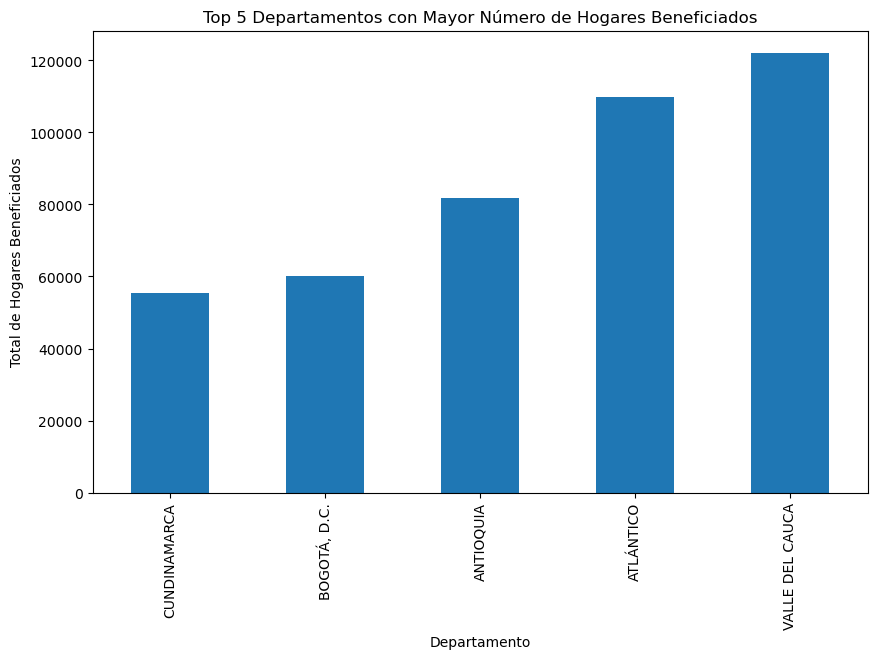

In [19]:
# Agrupar por departamento y sumar el número de hogares beneficiados, ordenando de menor a mayor
df_departamentos = df.groupby('departamento')['hogares'].sum().sort_values(ascending=True)

# Seleccionar los 5 departamentos con mayor número de hogares beneficiados
top_5_departamentos = df_departamentos.tail(5)

# Generar el gráfico de barras
plt.figure(figsize=(10,6))
top_5_departamentos.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Top 5 Departamentos con Mayor Número de Hogares Beneficiados')
plt.xlabel('Departamento')
plt.ylabel('Total de Hogares Beneficiados')

# Mostrar el gráfico
plt.show()


- Crea un **gráfico de línea** que muestre la **evolución del valor asignado** a lo largo de los años.


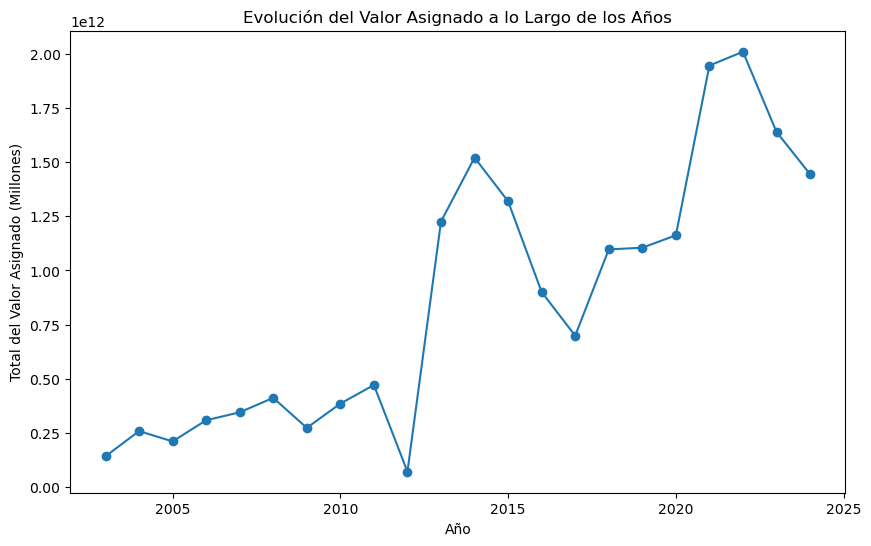

In [21]:
# Agrupar por año y sumar el valor asignado por cada año
df_evolucion = df.groupby('a_o_de_asignaci_n')['valor_asignado'].sum()

# Generar el gráfico de línea
plt.figure(figsize=(10,6))
df_evolucion.plot(kind='line', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución del Valor Asignado a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Total del Valor Asignado (Millones)')

# Mostrar el gráfico
plt.show()


#### 5. Análisis adicional:
- Investiga si existe una **relación** entre el número de hogares beneficiados y el valor asignado.


Matriz de correlación:
                 hogares  valor_asignado
hogares         1.000000        0.664266
valor_asignado  0.664266        1.000000


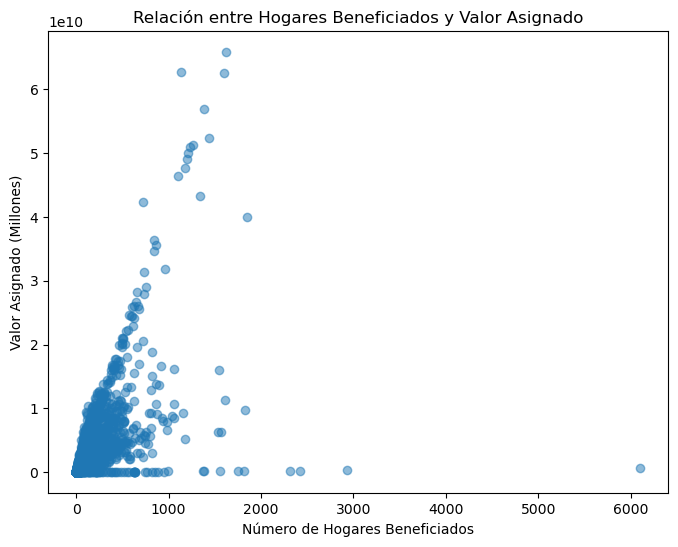

In [23]:
# Calcular la correlación entre 'hogares' y 'valor_asignado'
correlacion = df[['hogares', 'valor_asignado']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlacion)

# Visualizar la relación
plt.figure(figsize=(8,6))
plt.scatter(df['hogares'], df['valor_asignado'], alpha=0.5)
plt.title('Relación entre Hogares Beneficiados y Valor Asignado')
plt.xlabel('Número de Hogares Beneficiados')
plt.ylabel('Valor Asignado (Millones)')
plt.show()

### Conclusiones del Análisis Adicional

A partir del análisis de correlación y el gráfico de dispersión, se pueden extraer las siguientes conclusiones clave:

- **Relación positiva moderada**: Existe una correlación positiva moderada entre el número de hogares beneficiados y el valor asignado, con un coeficiente de correlación de **0.664**. Esto indica que, en general, cuando el valor asignado aumenta, también tiende a aumentar el número de hogares beneficiados. Por cada unidad de incremento en el valor asignado, el número de hogares beneficiados aumenta en **0.664 unidades** aproximadamente. Aunque esta relación no es perfectamente lineal, el coeficiente sugiere una conexión significativa entre ambas variables.

- **Relación no lineal, pero consistente**: El coeficiente de correlación menor que 1 sugiere que las variables no crecen en proporción exacta. Existen factores adicionales que podrían influir tanto en el valor asignado como en el número de hogares beneficiados. Sin embargo, la correlación es suficientemente fuerte como para concluir que hay una dependencia importante entre ambas variables.

- **Concentración de subsidios en valores bajos**: El gráfico de dispersión revela que la mayoría de los subsidios se concentran en la parte inferior izquierda del gráfico, lo que significa que **la mayor parte de los subsidios** se otorgan a un número relativamente bajo de hogares y con valores asignados modestos. Esto sugiere una política que favorece asignaciones más pequeñas, beneficiando a menos hogares en la mayoría de los casos.

- **Puntos atípicos**: Se observan algunos **puntos dispersos en la parte superior derecha** del gráfico de dispersión, que representan subsidios donde tanto el valor asignado como el número de hogares beneficiados son significativamente mayores. Estos casos, aunque menos comunes, pueden considerarse **atípicos** y podrían deberse a programas especiales, proyectos de gran envergadura o regiones con necesidades excepcionales.

- **Distribución de subsidios**: La aglomeración de puntos en la parte inferior izquierda también indica que la mayoría de los subsidios son moderados, tanto en valor como en el número de beneficiarios. **Los subsidios de mayor envergadura**, tanto en términos de valor asignado como en número de hogares beneficiados, son menos frecuentes. Esto podría reflejar una política más conservadora en la distribución de subsidios de gran escala.

- **Implicaciones para la política pública**: La correlación positiva moderada entre el número de hogares beneficiados y el valor asignado brinda una herramienta útil para los encargados de diseñar políticas públicas. Si bien los subsidios de mayor valor tienden a beneficiar a más hogares, es importante evaluar si esta asignación presupuestal es eficiente. El análisis muestra que el subsidio con el mayor número de hogares beneficiados no es el que tiene el mayor valor asignado. Este caso podría servir como ejemplo para desarrollar estrategias más eficientes, donde sea posible beneficiar a un mayor número de hogares con un presupuesto más equilibrado. Los encargados de las políticas podrían optimizar las asignaciones para maximizar el impacto social, beneficiando a más personas sin necesariamente incrementar desproporcionadamente el valor de los subsidios.
ía de los casos.
